Find missing values and drop the missing values by using .isnull() and .dropna()

Replace any non-numerical data with 0 by using .replace()

Find calculated average rating of each restaurants by using df.groupby() and .mean()

Find sns.distplot()

Make pie chart by using px.pie(df, values= , names=, title='')

In [1]:
%%html

<style type='text/css'>
.CodeMirror{font-style: serif;
           font-size: 16px;}
</style>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Read your data

In [4]:
df= pd.read_csv('C:\datascience\DataScience03\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
df.columns


Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
df.shape

(51717, 17)

In [8]:
# 2. Data cleaning: Find % of missing values in your data and deal with missing values

In [9]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
# to find features that contain missing values (NA or isnull())

feature_na= [feature for feature in df.columns if df[feature].isnull().sum()>0] 
feature_na

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [11]:
# rounds up to 4 decimal points

for feature in feature_na:
    print('{} has {} missing values'.format(feature, np.round(df[feature].isnull().sum()/len(df)*100, 4)))

rate has 15.0337 missing values
phone has 2.3358 missing values
location has 0.0406 missing values
rest_type has 0.4389 missing values
dish_liked has 54.2916 missing values
cuisines has 0.087 missing values
approx_cost(for two people) has 0.669 missing values


In [12]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [13]:
df.dropna(axis='index', subset=['rate'], inplace=True)

In [14]:
# the new df reflects all the number of rows with NA values dropped

df.shape

(43942, 17)

In [15]:
# In df['rate'], in order to drop 4.1/5 the /5 part, you have to make up a new function that does this

# the new function let's define as split(x)

def split(x):
    return x.split('/')[0]

In [16]:
# apply this new function 'split' into df['rate']

df['rate'] = df['rate'].apply(split)
df['rate']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rate, Length: 43942, dtype: object

In [17]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [18]:
# replace 'NEW' and '-' with value of 0

df.replace('NEW', 0, inplace=True)
df.replace('-', 0, inplace=True)

In [19]:
df['rate'].dtype

dtype('O')

In [20]:
# change the data type into float

df['rate']= df['rate'].astype(float)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
# 3.

# calculated average rating of each restaurant?
# Get a distribution of rating column & Find out what distribution this feature supports?
# What are top restaurant chains in Bengalore?
# How many restaurants don't accept online orders?

In [22]:
# do a groupby of all different names

# for each and every dataframe 'name', extract 'rate'

# and find mean()

df.groupby('name')['rate'].mean()

name
#FeelTheROLL                                    3.400000
#L-81 Cafe                                      3.900000
#refuel                                         3.700000
1000 B.C                                        3.200000
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C            3.700000
                                                  ...   
i-Bar - The Park Bangalore                      3.800000
iFruit Live Ice Creams                          3.400000
iSpice Resto Cafe                               3.700000
nu.tree                                         4.314286
re:cess - Hilton Bangalore Embassy GolfLinks    4.100000
Name: rate, Length: 7162, dtype: float64

In [23]:
# .to_frame() 

# .reset_index()

df_rate= df.groupby('name')['rate'].mean().to_frame().reset_index()
df_rate

,name,rate
0,#FeelTheROLL,3.400000
1,#L-81 Cafe,3.900000
2,#refuel,3.700000
3,1000 B.C,3.200000
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.700000
...,...,...
7157,i-Bar - The Park Bangalore,3.800000
7158,iFruit Live Ice Creams,3.400000
7159,iSpice Resto Cafe,3.700000
7160,nu.tree,4.314286


In [60]:
# reassign column names

df_rate.columns = ('restaurant name', 'average rating')
df_rate.head()

,restaurant name,average rating
0,#FeelTheROLL,3.4
1,#L-81 Cafe,3.9
2,#refuel,3.7
3,1000 B.C,3.2
4,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3.7


C:\Users\Kate\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='average rating', ylabel='Density'>

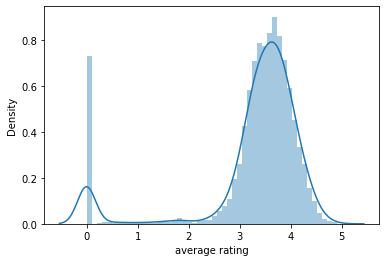

In [25]:
# sns.distplot( dataframe [columns you're concerned with])

sns.distplot(df_rate['average rating'])

In [26]:
df_rate.shape


(7162, 2)

In [27]:
chains= df['name'].value_counts()
chains

Cafe Coffee Day                89
Onesta                         85
Empire Restaurant              71
Kanti Sweets                   68
Just Bake                      68
                               ..
Hello Cafe                      1
Zamorin's Mappillah Biryani     1
De Grand                        1
Sandwich Jn                     1
KC Das - The Delite Foods       1
Name: name, Length: 7162, dtype: int64

sns.barplot(x=chains, y=chains.index)
plt.title('Most Famous Restaurant Chains in Bengalore')
plt.xlabel('Number of Outlets')

In [45]:
x= df['online_order'].value_counts()
x

Yes    28308
No     15634
Name: online_order, dtype: int64

In [59]:
# in the pie chart, use df, values(which values you're comparing in pie chart), names(gives labels)

# define label and then designate it to names in pie chart

import plotly.express as px

label=['accepted', 'unaccepted']

fig= px.pie(df, values=x, names= label, title='Restaurants accepting online orders')
fig.show()